# Chase Winslow

## What amateur teams have found the most success at producing NHL skaters and which are the best at producing goalies? 
These graphs will find which amateur teams and leagues have produced the best players. It will be interesting to if there are junior teams for each or if a team dominates both categories. I plan on looking at both all teams as well as 
excluding CHL teams to see which European and American have success. To find the best amateur teams for skaters, the games played and points of a player will be added together. Afterwards, to find the goalies score the games played and wins will be added together.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Loading and processing data into dfAma
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3

df = project_functions3.load_and_process("../data/raw/NHLDraft.csv")
df = df[df['amateur_team'].notnull()]
df.head(30)

,year,player,position,amateur_team,games_played,score,points,goalie_games_played,goalie_wins,Goalie_score
225,2021,Owen Power,D,Michigan (Big Ten),8.0,11.0,3.0,NaN,NaN,NaN
226,2021,Matthew Beniers,C,Michigan (Big Ten),10.0,19.0,9.0,NaN,NaN,NaN
227,2021,Mason Mctavish,C,Peterborough Petes (OHL),9.0,12.0,3.0,NaN,NaN,NaN
229,2021,Kent Johnson,C,Michigan (Big Ten),9.0,12.0,3.0,NaN,NaN,NaN
231,2021,William Eklund,LW,Djurgardens IF (Sweden),9.0,13.0,4.0,NaN,NaN,NaN
235,2021,Cole Sillinger,C,Sioux Falls Stampede (USHL),79.0,110.0,31.0,NaN,NaN,NaN
283,2021,Janis Moser,D,EHC Biel-Bienne (Swiss),43.0,58.0,15.0,NaN,NaN,NaN
448,2020,Alexis Lafreniere,LW,Rimouski Oceanic (QMJHL),135.0,187.0,52.0,NaN,NaN,NaN
449,2020,Quinton Byfield,C,Sudbury Wolves (OHL),46.0,57.0,11.0,NaN,NaN,NaN
450,2020,Tim Stützle,LW,Adler Mannheim (Germany),132.0,219.0,87.0,NaN,NaN,NaN


In [10]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
plt.rc("axes.spines", top=False, right=False)


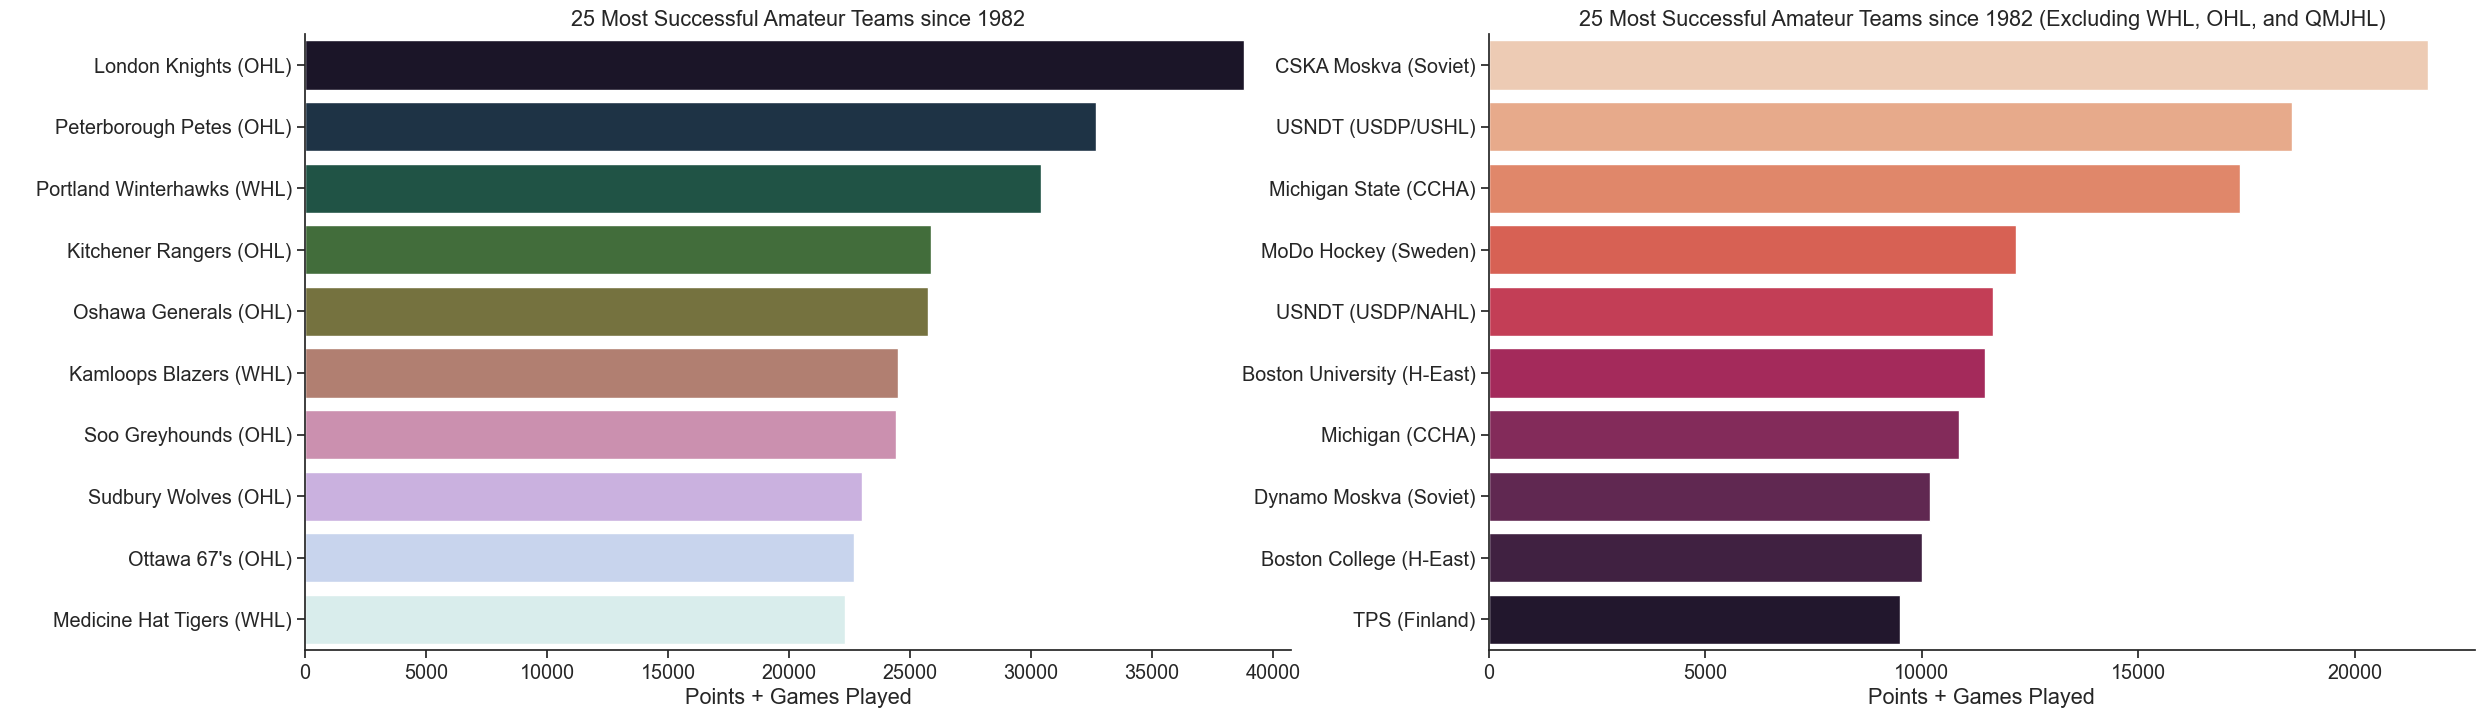

In [11]:
# Calculate total score for each team
df_scores = df.groupby('amateur_team')[['games_played', 'points']].sum(numeric_only=False)
df_scores['score'] = df_scores['games_played'] + df_scores['points']
df_scores = df_scores.sort_values('score', ascending=False)[:10]
df_scores['amateur_team'] = df_scores.index

# Set color palette
colors = sns.color_palette("cubehelix", len(df_scores), as_cmap=False)

# Create first subplot
fig, axs = plt.subplots(ncols=2, figsize=(28, 8))
ax1 = axs[0]
sns.barplot(x='score', y='amateur_team', data=df_scores, order=df_scores['amateur_team'], palette=colors, ax=ax1)
ax1.set_title('25 Most Successful Amateur Teams since 1982')

ax1.set_xlabel('Points + Games Played')
ax1.set_ylabel(' ')

# Filter data to include only players with an amateur team and not from WHL, OHL or QMJHL
df_Europe = df[~df['amateur_team'].str.contains('WHL|OHL|QMJHL')]

# Calculate total score for each team
df_Europe = df_Europe.groupby('amateur_team').sum(numeric_only=True)[['games_played', 'points']]
df_Europe['score'] = df_Europe['games_played'] + df_Europe['points']
df_Europe = df_Europe.sort_values('score', ascending=False)[:10]
df_Europe['amateur_team'] = df_Europe.index

# Set color palette
colors = sns.color_palette("rocket_r", len(df_Europe), as_cmap=False)

# Create second subplot
ax2 = axs[1]
sns.barplot(x='score', y='amateur_team', data=df_Europe, order=df_Europe['amateur_team'], palette=colors, ax=ax2)
ax2.set_title('25 Most Successful Amateur Teams since 1982 (Excluding WHL, OHL, and QMJHL)')
ax2.set_ylabel(' ')
ax2.set_xlabel('Points + Games Played')

# Show plot
plt.show()



This graph shows the most susscessful junior programs since 1982. There is a clear dominance of OHL teams at the top with 7 spots in the top 10. Both London and Peterborough and big leads on the teams below them. The first European team is CSKA Moskva which shows Canada's clear production of great young prospects. 
Outside of Canada, CSKA Moskva has a decent gap between them, second place USA U-18, and third place Michiagn State. After the teams start to average out and there is no clear country that dominates as the US, Finland, Sweden and Russia all have multiple teams listed. Those countries named are the best hockey nations in Europe and from this data it is clear why.

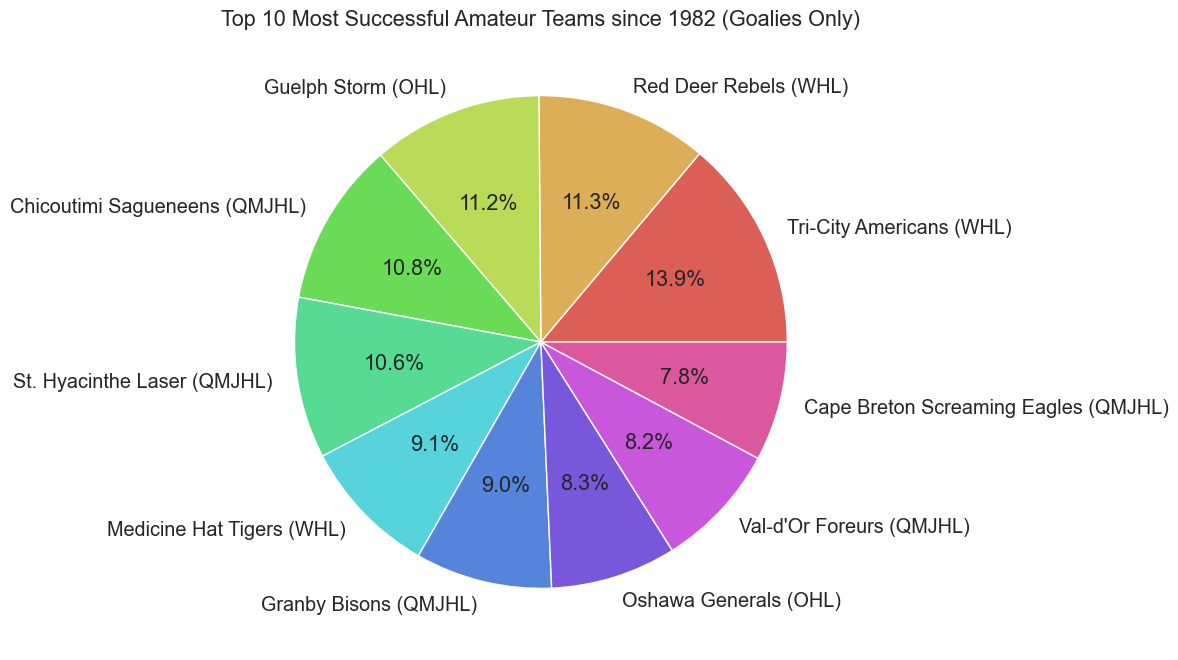

In [12]:
# Filter data to include only goalies with an amateur team
df_amateur_goalies = df[df['position'] == 'G']



# Calculate total score for each team
Gdf = df_amateur_goalies.groupby('amateur_team', as_index=False).sum(numeric_only=True)[['amateur_team', 'goalie_games_played', 'goalie_wins']]
Gdf['score'] = Gdf['goalie_games_played'] + Gdf['goalie_wins']
Gdf = Gdf.sort_values('score', ascending=False)[:10]

# Set color palette
colors = sns.color_palette("hls", len(Gdf))

# Set figure size
fig = plt.figure(figsize=(10, 8))

# Generate plot using matplotlib
ax = fig.add_subplot(111)
ax.pie(Gdf['score'], labels=Gdf['amateur_team'], colors=colors, autopct='%1.1f%%')

# Set title and axis labels
plt.title('Top 10 Most Successful Amateur Teams since 1982 (Goalies Only)')


# Show plot
plt.show()




This graph shows the top goalie producing teams since 1982. Tri City(red) in the best team among all with Red Deer behind them. The postion has also been a strength for Canada over the years. All of the top 10 teams are from Canada's junior league. There is no clear standout team here as goalies in hockey are more unpredictable in there development. Which likely causes teams to no focus on development for them.

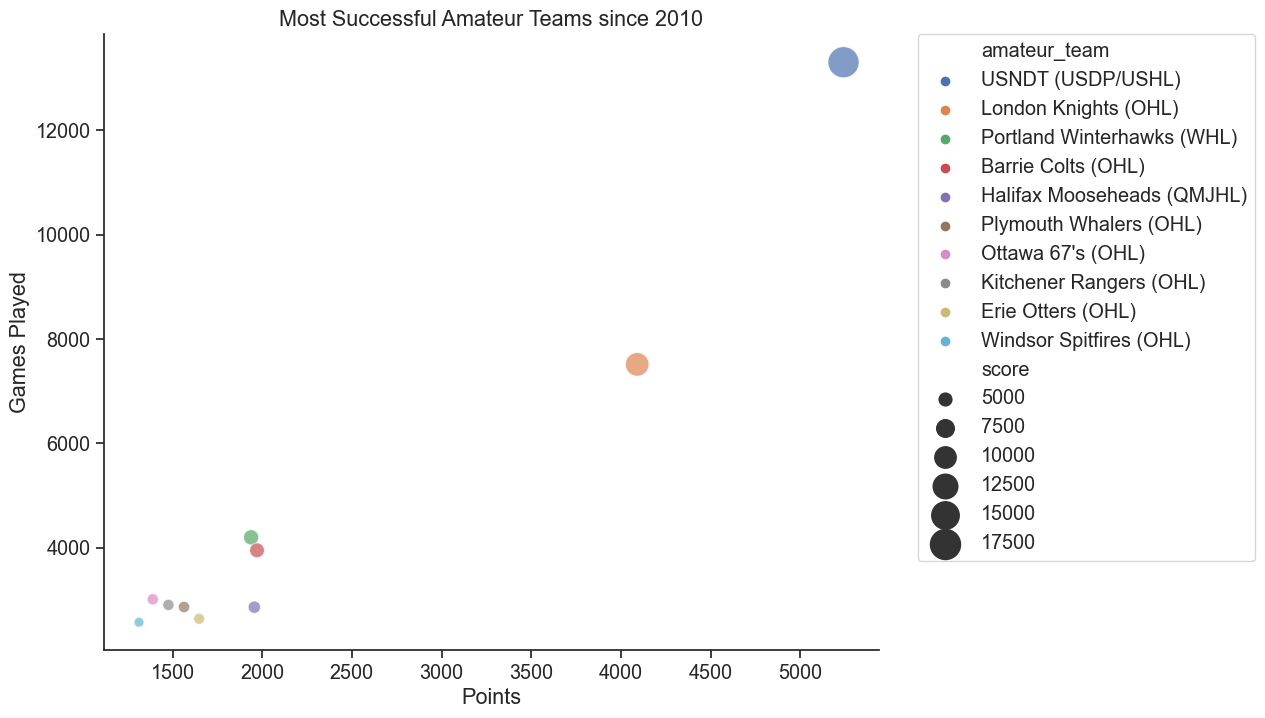

In [13]:
df2010 = df.loc[:2791]

# Calculate total score for each team
df2010Sc = df2010.groupby('amateur_team', as_index=False).sum(numeric_only=True)[['amateur_team', 'games_played', 'points']]
df2010Sc['score'] = df2010Sc['games_played'] + df2010Sc['points']
df2010Sc = df2010Sc.sort_values('score', ascending=False)[:10]

# Set figure size
plt.figure(figsize=(10, 8))

# Generate plot using seaborn
sns.scatterplot(x='points', y='games_played', size='score', hue='amateur_team', data=df2010Sc, sizes=(50, 500), alpha=0.7)
plt.title('Most Successful Amateur Teams since 2010')
plt.ylabel('Games Played')
plt.xlabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


This graph shows the recent greatest of the USA Development team since 2010. When using data from 1982 the program was 16th, but since 2010 they have leapfrogged everyone by a huge margin. This is likely due to the increased interest in hockey in the US, as well as the fact for the US does not have the same system as Canada for young players. In Canada young players are drafted to a team in the WHL, OHL, or QMJHL depending on where they live. However, in the US the best young players can choose to play for the US Development team meaning the best young players almost always come from their team.

<Figure size 2000x1500 with 0 Axes>

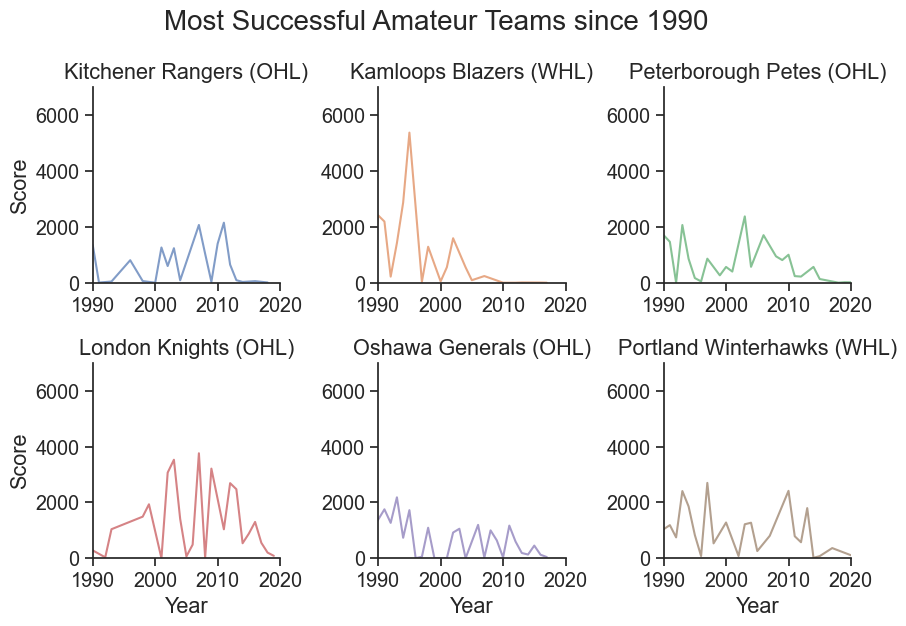

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Filter data to include only players with an amateur team
df_amateur2 = df[df['amateur_team'].notnull()]

# Calculate total score for each team
df_scores2 = df_amateur2.groupby(['amateur_team', 'year'], as_index=False).sum()[['amateur_team', 'year', 'games_played', 'points']]
df_scores2['score'] = df_scores2['games_played'] + df_scores2['points']
df_scores2 = df_scores2.sort_values(['score'], ascending=False)

# Get top 9 teams based on score
top9_teams = df_scores2.groupby(['amateur_team']).sum().sort_values(['score'], ascending=False).head(6).index.tolist()

# Filter data to include only top 9 teams
df_scores2 = df_scores2[df_scores2['amateur_team'].isin(top9_teams)]

# Set figure size
plt.figure(figsize=(20, 15))

# Generate plot using seaborn facet grid
g = sns.FacetGrid(df_scores2, col='amateur_team', col_wrap=3, hue='amateur_team', sharex=False, sharey=False)
g.map(sns.lineplot, 'year', 'score', alpha=0.7)
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Score")
g.fig.suptitle("Most Successful Amateur Teams since 1990", fontsize=20, y=1.05)
g.set(xlim=(1990, 2020), ylim=(0, 7000))
plt.show()


This facet grid shows the top 6 teams since 1990 and how well they have done over the years. Kamloops had a clear gold days of players in the mid-late 90s, however since then they haven't been able to replicate the success. Teams like Oshawa and Portland have been very consistent through the years. Looking at London's graph it is clear why they are the most successful as the maintain pushing out great players over the 30 year period.